
# Ejercicios de Bibliotecas de Python y Modelos de Machine Learning

Este cuaderno contiene ejercicios prácticos para practicar el uso de **NumPy, Pandas, Matplotlib** y **Modelos Básicos de Machine Learning**.



## 1️⃣ Ejercicios Básicos - NumPy, Pandas y Matplotlib

Estos ejercicios están diseñados para ayudar a comprender las funciones básicas de estas bibliotecas.



### 📌 Ejercicio 1: Operaciones con Arrays en NumPy  
Crea un array de NumPy con los números del 1 al 10 e imprime:  
- El array original.  
- El array multiplicado por 2.  
- La suma total de los elementos.


In [ ]:

import numpy as np

# Crear un array con los números del 1 al 10
arr = np.arange(1, 11)

# Operaciones
arr_doble = arr * 2
suma_total = arr.sum()

# Mostrar resultados
print("Array original:", arr)
print("Array multiplicado por 2:", arr_doble)
print("Suma total de los elementos:", suma_total)



### 📌 Ejercicio 2: Creación de un DataFrame en Pandas  
Crea un DataFrame con datos de ventas de productos e imprime:  
- El DataFrame original.  
- Los productos con precio mayor a 50.


In [ ]:

import pandas as pd

# Crear un DataFrame de productos
datos = {
    "Producto": ["Laptop", "Mouse", "Teclado", "Monitor", "Impresora"],
    "Precio": [800, 25, 45, 150, 100]
}

df = pd.DataFrame(datos)

# Filtrar productos con precio mayor a 50
productos_caros = df[df["Precio"] > 50]

# Mostrar resultados
print("DataFrame original:
", df)
print("
Productos con precio mayor a 50:
", productos_caros)



## 2️⃣ Ejercicios Intermedios - NumPy, Pandas y Matplotlib



### 📌 Ejercicio 3: Gráfico de Barras de Ventas  
Crea un gráfico de barras con ventas de diferentes tiendas.


In [ ]:

import matplotlib.pyplot as plt

# Datos de ventas
tiendas = ["Tienda A", "Tienda B", "Tienda C", "Tienda D"]
ventas = [1000, 1500, 900, 1300]

# Crear el gráfico de barras
plt.bar(tiendas, ventas, color='blue')
plt.title("Ventas por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ventas en $")
plt.show()



### 📌 Ejercicio 4: Análisis de Datos de Ventas  
Agrega una columna con descuentos del 10% a cada producto y calcula el precio final.


In [ ]:

# Agregar columna de descuento
df["Descuento"] = df["Precio"] * 0.10
df["Precio Final"] = df["Precio"] - df["Descuento"]

# Mostrar el DataFrame actualizado
print(df)



## 3️⃣ Ejercicios Básicos - Modelos de Machine Learning  



### 📌 Ejercicio 5: Regresión Lineal - Predicción de Precios de Casas  
Cambia los valores de **X_nuevo** y observa cómo cambia la predicción del precio.


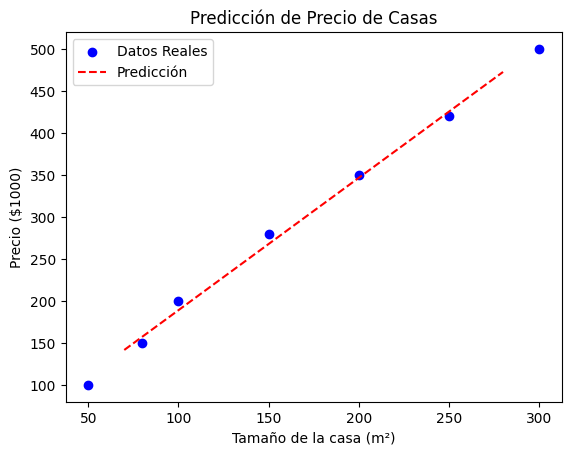

Tamaño: 70 m² → Precio Predicho: $141.62 mil
Tamaño: 110 m² → Precio Predicho: $204.66 mil
Tamaño: 160 m² → Precio Predicho: $283.46 mil
Tamaño: 220 m² → Precio Predicho: $378.02 mil
Tamaño: 280 m² → Precio Predicho: $472.59 mil


In [6]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos de entrenamiento
X = np.array([50, 80, 100, 150, 200, 250, 300]).reshape(-1, 1)
y = np.array([100, 150, 200, 280, 350, 420, 500])

# Crear modelo y entrenarlo
modelo = LinearRegression()
modelo.fit(X, y)

# Cambia estos valores y ejecuta de nuevo
X_nuevo = np.array([70, 110, 160, 220, 280]).reshape(-1, 1)
y_pred = modelo.predict(X_nuevo)

# Graficar
plt.scatter(X, y, color='blue', label='Datos Reales')
plt.plot(X_nuevo, y_pred, color='red', linestyle='--', label='Predicción')
plt.xlabel("Tamaño de la casa (m²)")
plt.ylabel("Precio ($1000)")
plt.title("Predicción de Precio de Casas")
plt.legend()
plt.show()

# Mostrar predicciones
for i, precio in zip(X_nuevo.flatten(), y_pred):
    print(f"Tamaño: {i} m² → Precio Predicho: ${precio:.2f} mil")



## 4️⃣ Ejercicios Intermedios - Modelos de Machine Learning  


 Contenido del dataset
El dataset contiene 150 muestras de flores, distribuidas en 3 clases:

Clase (target)	Código	Descripción breve
Iris-setosa	0	Fácil de distinguir, muy separada.
Iris-versicolor	1	Tiene características intermedias.
Iris-virginica	2	Similar a versicolor, pero más grande.


Cada muestra tiene 4 características numéricas (features):

Feature (característica)	Descripción	Unidad
sepal length (cm)	Longitud del sépalo	centímetros
sepal width (cm)	Ancho del sépalo	centímetros
petal length (cm)	Longitud del pétalo	centímetros
petal width (cm)	Ancho del pétalo	centímetros



### 📌 Ejercicio 6: Comparación de Modelos con Datos Ruidosos  
Agrega ruido a los datos y observa cómo afecta la precisión de los modelos.


In [27]:

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Cargar el dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agregar ruido
X_train_ruido = X_train + np.random.normal(0, 0.1, X_train.shape)
X_test_ruido = X_test + np.random.normal(0, 0.1, X_test.shape)

# Modelos
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_logistico = LogisticRegression(max_iter=200)

# Entrenar y evaluar
modelo_arbol.fit(X_train_ruido, y_train)
modelo_logistico.fit(X_train_ruido, y_train)

accuracy_arbol = accuracy_score(y_test, modelo_arbol.predict(X_test_ruido))
accuracy_logistico = accuracy_score(y_test, modelo_logistico.predict(X_test_ruido))

print(f"Precisión Árbol de Decisión con ruido: {accuracy_arbol * 100:.2f}%")
print(f"Precisión Regresión Logística con ruido: {accuracy_logistico * 100:.2f}%")


Precisión Árbol de Decisión con ruido: 100.00%
Precisión Regresión Logística con ruido: 100.00%


1.-Carga el dataset Iris, que es de clasificación multiclase (tres clases de flores).

2.-Divide los datos en entrenamiento y prueba.

3.-Le añade ruido aleatorio (ruido gaussiano) a los datos para simular un escenario más realista donde los datos están "sucios".

Entrena dos modelos distintos:

4.-Un árbol de decisión (DecisionTreeClassifier)
5.-Una regresión logística (LogisticRegression)
6.-Evalúa la precisión (accuracy) de ambos modelos sobre los datos ruidosos de prueba.
7.-Imprime los resultados, mostrando qué tan bien cada modelo soporta el ruido.